In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [4]:
# df_patients = pd.read_csv("data-p2/patients.csv")
# df_mimic3d = pd.read_csv("data-p2/mimic3d.csv")

# df = df_mimic3d[df_mimic3d['hadm_id'].isin(df_patients['hadm_id'])]

# # df.to_csv("data-p2/filtered_mimic3d.csv", index=False)

df = pd.read_csv("data-p2/filtered_mimic3d.csv")
print(df.head())

   hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
1   100011      M   21    14.38  EMERGENCY  CLINIC REFERRAL/PREMATURE   
2   100036      F   82    10.04  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3   100060      F   48     4.46  EMERGENCY       EMERGENCY ROOM ADMIT   
4   100069      F   33     0.71  EMERGENCY  PHYS REFERRAL/NORMAL DELI   

                                     AdmitDiagnosis insurance       religion  \
0                                    UPPER GI BLEED   Private  NOT SPECIFIED   
1  MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES  Medicaid  NOT SPECIFIED   
2                                               CHF  Medicare       CATHOLIC   
3                                          OVERDOSE  Medicare       CATHOLIC   
4                               ORGAN DONOR ACCOUNT   Private       CATHOLIC   

  marital_status  ... NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  \


In [17]:
df.dtypes

hadm_id               int64
gender               object
age                   int64
LOSdays             float64
admit_type           object
admit_location       object
AdmitDiagnosis       object
insurance            object
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis        float64
NumProcs            float64
AdmitProcedure       object
NumCPTevents        float64
NumInput            float64
NumLabs             float64
NumMicroLabs        float64
NumNotes            float64
NumOutput           float64
NumRx               float64
NumProcEvents       float64
NumTransfers        float64
NumChartEvents      float64
ExpiredHospital       int64
TotalNumInteract    float64
LOSgroupNum           int64
dtype: object

In [22]:
df["admit_type"].nunique()

4

In [23]:
df["admit_location"].nunique()

8

In [40]:
df["AdmitProcedure"].nunique()

417

In [21]:
df["AdmitDiagnosis"].nunique()

1302

In [28]:
df["religion"].nunique()

16

In [29]:
df["insurance"].nunique()

5

In [30]:
df["marital_status"].nunique()

6

In [31]:
df["ethnicity"].nunique()

32

In [32]:
df["gender"].nunique()

2

In [43]:
# One-hot encode low-cardinality columns
df_one_hot = pd.get_dummies(df[['gender', 'admit_type', 'admit_location','religion','insurance', 'marital_status','ethnicity']], drop_first=True)

# Binary encode high-cardinality columns
binary_encoder = ce.BinaryEncoder(cols=['AdmitDiagnosis', 'AdmitProcedure'], drop_invariant=True)
df_binary = binary_encoder.fit_transform(df[['AdmitDiagnosis', 'AdmitProcedure']])

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(['hadm_id'], axis=1)

# Concatenate everything
df_concat = pd.concat([df_numeric, df_one_hot, df_binary], axis=1)

In [45]:
df_concat.shape

(2976, 104)

In [50]:
print([i for i in df_concat.dtypes])

[dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype(

In [46]:
#df_concat.to_csv("data-p2/encoded_filtered_mimic3d.csv", index=False)

In [51]:
correlation_matrix = df_concat.corr()

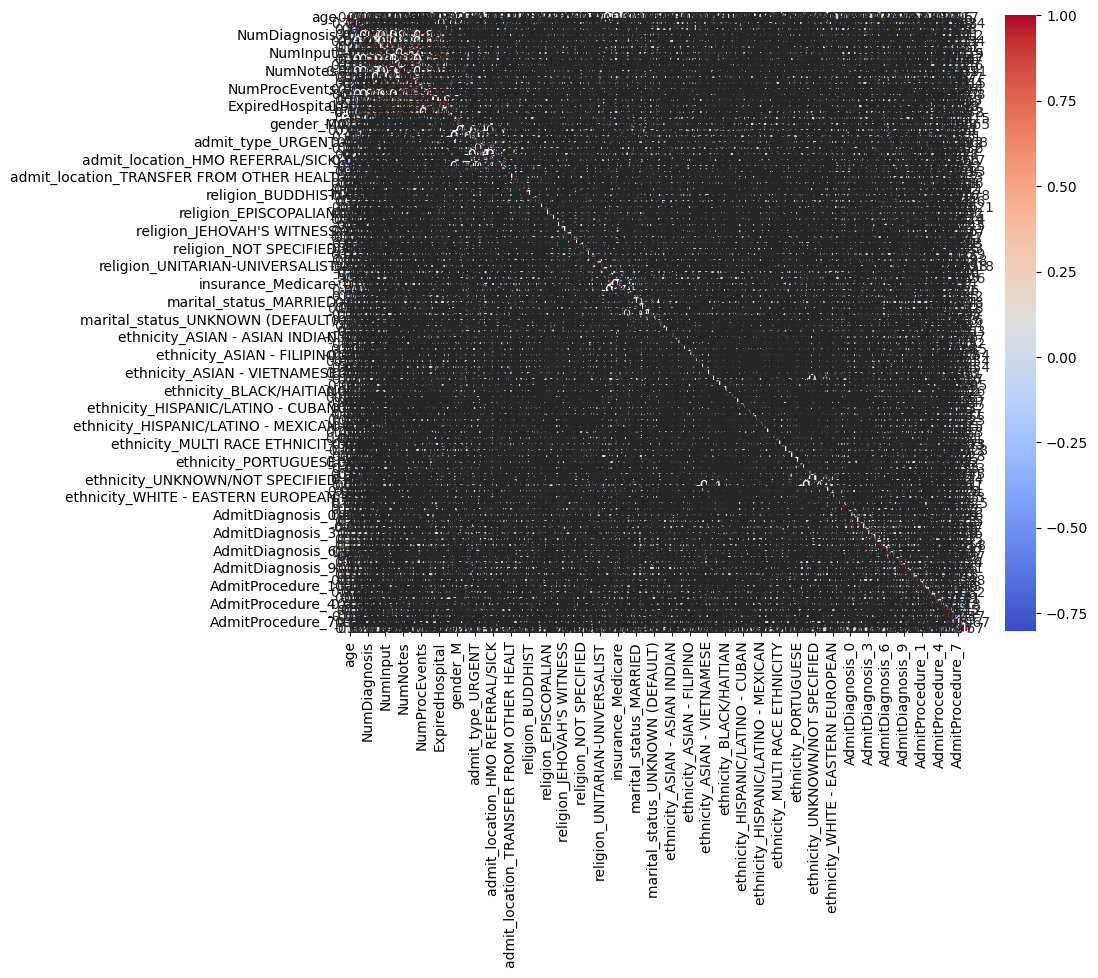

In [52]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()